# Test efood

In [29]:
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv("orders.csv")

In [3]:
#checking the structure of the data
df.head(10)

,order_id,user_id,order_timestamp,city,cuisine,paid_cash,amount
0,7322173742136,94223136441,2022-01-18 15:41:28 UTC,Αίγιο,Breakfast,True,3.6
1,7210978616924,204794985423,2022-01-02 17:50:50 UTC,Αγρίνιο,Breakfast,True,1.9
2,7221232906132,12703920390,2022-01-04 08:37:12 UTC,Αγρίνιο,Breakfast,True,1.7
3,7399605199800,673310109528,2022-01-31 11:33:05 UTC,Λιβαδειά,Breakfast,True,3.0
4,7264221279744,673310109528,2022-01-10 11:18:28 UTC,Λιβαδειά,Breakfast,True,3.0
5,7290656850956,212289897372,2022-01-14 10:49:34 UTC,Λαμία,Breakfast,False,3.0
6,7251782527516,255327451974,2022-01-08 16:39:02 UTC,Βόλος,Breakfast,False,6.2
7,7373393770196,343181291166,2022-01-27 11:08:07 UTC,Βόλος,Breakfast,False,4.1
8,7234487849604,45669681666,2022-01-06 03:38:20 UTC,Βόλος,Breakfast,False,10.5
9,7375190020184,287462587230,2022-01-27 17:59:26 UTC,Βόλος,Breakfast,False,6.3


In [5]:
#check the no. of rows and column of the dataset
df.shape

(534270, 7)

In [6]:
#check the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534270 entries, 0 to 534269
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   order_id         534270 non-null  int64  
 1   user_id          534270 non-null  int64  
 2   order_timestamp  534270 non-null  object 
 3   city             534270 non-null  object 
 4   cuisine          534270 non-null  object 
 5   paid_cash        534270 non-null  bool   
 6   amount           534270 non-null  float64
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 25.0+ MB


In [8]:
#check the missing values in the dataset
df.isnull().sum()

order_id           0
user_id            0
order_timestamp    0
city               0
cuisine            0
paid_cash          0
amount             0
dtype: int64

In [4]:
# Convert the order_timestamp column to a datetime type
df['order_timestamp'] = pd.to_datetime(df['order_timestamp'])

In [5]:
# Extract the month from the order_timestamp column
df['month'] = df['order_timestamp'].dt.month

In [5]:
#checking the structure of the data
df.head(10)

,order_id,user_id,order_timestamp,city,cuisine,paid_cash,amount,month
0,7322173742136,94223136441,2022-01-18 15:41:28+00:00,Αίγιο,Breakfast,True,3.6,1
1,7210978616924,204794985423,2022-01-02 17:50:50+00:00,Αγρίνιο,Breakfast,True,1.9,1
2,7221232906132,12703920390,2022-01-04 08:37:12+00:00,Αγρίνιο,Breakfast,True,1.7,1
3,7399605199800,673310109528,2022-01-31 11:33:05+00:00,Λιβαδειά,Breakfast,True,3.0,1
4,7264221279744,673310109528,2022-01-10 11:18:28+00:00,Λιβαδειά,Breakfast,True,3.0,1
5,7290656850956,212289897372,2022-01-14 10:49:34+00:00,Λαμία,Breakfast,False,3.0,1
6,7251782527516,255327451974,2022-01-08 16:39:02+00:00,Βόλος,Breakfast,False,6.2,1
7,7373393770196,343181291166,2022-01-27 11:08:07+00:00,Βόλος,Breakfast,False,4.1,1
8,7234487849604,45669681666,2022-01-06 03:38:20+00:00,Βόλος,Breakfast,False,10.5,1
9,7375190020184,287462587230,2022-01-27 17:59:26+00:00,Βόλος,Breakfast,False,6.3,1


In [6]:
# Group the data by the user_id and month columns to get the order frequency
frequency = df.groupby(['user_id', 'month']).size().reset_index(name='frequency')

In [7]:
# Group the data by the user_id column to get the total order value
value = df.groupby('user_id').agg({'amount': 'sum'}).reset_index()

In [8]:
# Merge the frequency and value data into one DataFrame
segmentation = frequency.merge(value, on='user_id')

In [9]:
segmentation.head(10)

,user_id,month,frequency,amount
0,44118921,1,1,33.30
1,108938802,1,3,44.20
2,110361993,1,11,137.00
3,138437670,1,1,5.50
4,144777339,1,14,60.80
5,145424244,1,12,162.75
6,153963390,1,3,36.50
7,155515962,1,1,5.50
8,165219537,1,1,4.30
9,167289633,1,2,17.00


In [17]:
print(segmentation.describe())

            user_id     month      frequency         amount
count  1.219430e+05  121943.0  121943.000000  121943.000000
mean   3.266315e+11       1.0       4.381309      37.339123
std    2.131171e+11       0.0       5.443188      41.786941
min    4.411892e+07       1.0       1.000000       0.400000
25%    1.477133e+11       1.0       1.000000      11.600000
50%    2.788117e+11       1.0       2.000000      23.300000
75%    5.427711e+11       1.0       5.000000      47.300000
max    6.855679e+11       1.0     135.000000    1351.500000


In [9]:
# Define a function to segment customers based on frequency and order value
def customer_segment(row):
    if row['frequency'] >= 2 and row['amount'] >= 30:
        return 'High Value High Frequency'
    elif row['frequency'] >= 2 and row['amount'] < 20:
        return 'Low Value High Frequency'
    elif row['frequency'] < 2 and row['amount'] >= 30:
        return 'High Value Low Frequency'
    else:
        return 'Low Value Low Frequency'

In [10]:
# Apply the customer_segment function to the segmentation DataFrame
segmentation['segment'] = segmentation.apply(customer_segment, axis=1)

In [11]:
breakfast_segment = segmentation[segmentation['cuisine'] == 'Breakfast']

KeyError: 'cuisine'

In [17]:
breakfast_df.head(10)

,order_id,user_id,order_timestamp,city,cuisine,paid_cash,amount,month
0,7322173742136,94223136441,2022-01-18 15:41:28+00:00,Αίγιο,Breakfast,True,3.6,1
1,7210978616924,204794985423,2022-01-02 17:50:50+00:00,Αγρίνιο,Breakfast,True,1.9,1
2,7221232906132,12703920390,2022-01-04 08:37:12+00:00,Αγρίνιο,Breakfast,True,1.7,1
3,7399605199800,673310109528,2022-01-31 11:33:05+00:00,Λιβαδειά,Breakfast,True,3.0,1
4,7264221279744,673310109528,2022-01-10 11:18:28+00:00,Λιβαδειά,Breakfast,True,3.0,1
5,7290656850956,212289897372,2022-01-14 10:49:34+00:00,Λαμία,Breakfast,False,3.0,1
6,7251782527516,255327451974,2022-01-08 16:39:02+00:00,Βόλος,Breakfast,False,6.2,1
7,7373393770196,343181291166,2022-01-27 11:08:07+00:00,Βόλος,Breakfast,False,4.1,1
8,7234487849604,45669681666,2022-01-06 03:38:20+00:00,Βόλος,Breakfast,False,10.5,1
9,7375190020184,287462587230,2022-01-27 17:59:26+00:00,Βόλος,Breakfast,False,6.3,1


In [18]:
#group the breakfast data by the segment column
#i have an error here
breakfast_segment = breakfast_df.groupby('segment').agg({'user_id': 'count'}).reset_index()

KeyError: 'segment'

In [31]:
#plot the number of users in each segment
plt.bar(breakfast_segment['segment'], breakfast_segment['user_id'])
plt.xlabel('Segment')
plt.ylabel('Number of users')
plt.title('Breakfast Orders by User Segment')
plt.show()

NameError: name 'breakfast_segment' is not defined

In [19]:
# Find the segment with the most number of users who ordered Breakfast cuisine_parent
valuable_target = breakfast_segment.loc[breakfast_segment['user_id'].idxmax(), 'segment']

NameError: name 'breakfast_segment' is not defined

In [ ]:
# Print the result
print("The valuable target segment for a Marketing campaign about Breakfast cuisine_parent is:", valuable_target)

In [12]:
import matplotlib.pyplot as plt

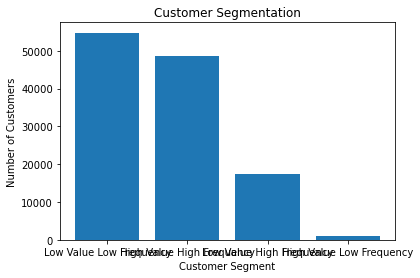

In [17]:
# Plot the customer segments as a bar chart
plt.bar(segmentation['segment'].value_counts().index, segmentation['segment'].value_counts().values)

# Add labels to the x and y axes
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')

# Add a title to the chart
plt.title('Customer Segmentation')

# Show the plot
plt.show()

In [18]:
# Filter the data to only include breakfast orders
breakfast_df = df[df['cuisine'] == 'Breakfast']


In [19]:
# Group the data by city and count the number of orders in each city
city_counts = breakfast_df.groupby('city').count()['order_id']

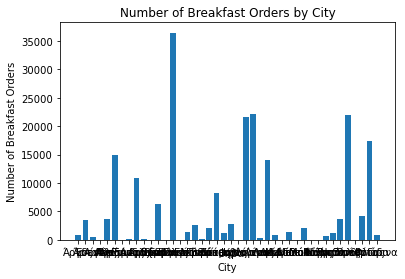

In [20]:
# Plot the city counts as a bar chart
plt.bar(city_counts.index, city_counts.values)

# Add labels to the x and y axes
plt.xlabel('City')
plt.ylabel('Number of Breakfast Orders')

# Add a title to the chart
plt.title('Number of Breakfast Orders by City')

# Show the plot
plt.show()

In [21]:
# Calculate the mean of the "amount" column for breakfast orders
mean_amount = breakfast_df["amount"].mean()

# Calculate the median of the "amount" column for breakfast orders
median_amount = breakfast_df["amount"].median()

# Calculate the standard deviation of the "amount" column for breakfast orders
std_amount = breakfast_df["amount"].std()

# Calculate the minimum and maximum of the "amount" column for breakfast orders
min_amount = breakfast_df["amount"].min()
max_amount = breakfast_df["amount"].max()

In [22]:
# Print the results
print("Mean: ", mean_amount)
print("Median: ", median_amount)
print("Standard Deviation: ", std_amount)
print("Minimum: ", min_amount)
print("Maximum: ", max_amount)

Mean:  5.093825295845916
Median:  4.4
Standard Deviation:  3.248764176066746
Minimum:  0.4
Maximum:  150.0


In [23]:
# Group the data by city
city_group = breakfast_df.groupby(['city'])

# Calculate the mean order value and number of orders per city
city_stats = city_group.agg({'amount': 'mean', 'order_id': 'count'})

# Rename the columns to be more descriptive
city_stats = city_stats.rename(columns={'amount': 'mean_order_value', 'order_id': 'number_of_orders'})

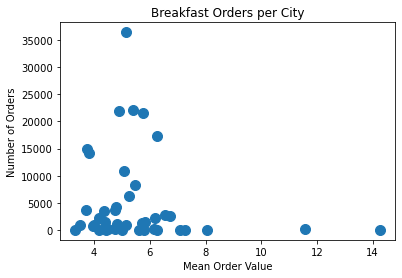

In [24]:
# Plot the mean order value and number of orders per city
city_stats.plot(kind='scatter', x='mean_order_value', y='number_of_orders', s=100)

# Add a title and axis labels to the plot
plt.title("Breakfast Orders per City")
plt.xlabel("Mean Order Value")
plt.ylabel("Number of Orders")

# Show the plot
plt.show()

In [27]:
#try to predicte something throught the time, the orders of breakfast
import pandas as pd
from prophet import Prophet

breakfast_df = breakfast_df[['order_timestamp', 'order_id']]

# Rename the columns to match the format required by Prophet
breakfast_df = breakfast_df.rename(columns={'order_timestamp': 'ds', 'order_id': 'y'})

# Create a Prophet model
model = Prophet()

# Fit the model to the data
model.fit(breakfast_df)

# Create a dataframe to hold future dates
future_dates = model.make_future_dataframe(periods=365)

# Make predictions for the future
forecast = model.predict(future_dates)

# Plot the results
model.plot(forecast)

ModuleNotFoundError: No module named 'prophet'

# I tried to run a script to predict breakfast orders through the time with time series model but jupyter didnt recognize prophet. 

In [28]:
# Group the data by cuisine and calculate the mean order value and number of orders per cuisine
cuisine_group = df.groupby(['cuisine'])
cuisine_stats = cuisine_group.agg({'amount': 'mean', 'order_id': 'count'})

# Rename the columns to be more descriptive
cuisine_stats = cuisine_stats.rename(columns={'amount': 'mean_order_value', 'order_id': 'number_of_orders'})

# Create a bar plot to visualize the results
cuisine_stats.plot(kind='bar', x='cuisine', y=['mean_order_value', 'number_of_orders'], 
                   title='Cuisine Statistics (mean order value and number of orders)')
plt.show()

KeyError: 'cuisine'